In [1]:
# http://www.insightsbot.com/blog/C8Fm4/perceptron-algorithm-part-2-python-code-machine-learning-101

#required library which holes the iris dataset
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

#load the iris dataset
iris = load_iris()
#our inputs will contain 2 features
X = iris.data[:, [0, 1, 2, 3]]
#the labels are the following
y = iris.target

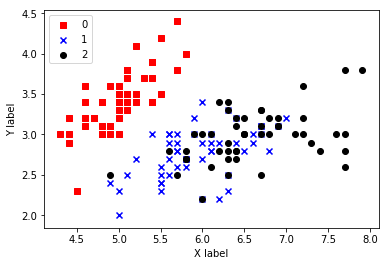

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_scatter(X,y):
    colors = ["red","blue","black","yellow","green","purple","orange"]
    markers = ('s', 'x', 'o', '^', 'v')
    
    for i, yi in enumerate(np.unique(y)):
        Xi = X[y==yi]
        plt.scatter(Xi[:,0], Xi[:,1],
                        color=colors[i], marker=markers[i], label=yi)
    
    plt.xlabel('X label')
    plt.ylabel('Y label')
    plt.legend(loc='upper left')

#Generate the Scatterplot
plot_scatter(X,y)

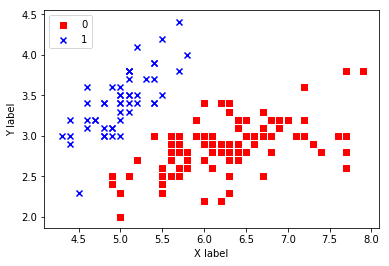

In [3]:
#Classifier for y = 0
y = np.where(y == 0, 1, 0)

plot_scatter(X,y)

In [4]:
class Perceptron(object):

    def __init__(self, learningRate=0.01, n_iter=50, random_state=1):
        self.learningRate = learningRate
        self.n_iter = n_iter
        self.random_state = random_state
        self.errors_ = []
        
    def z(self, X):
        z = np.dot(X, self.weights[1:]) + self.weights[0] 
        return z
        
    def predict(self, X):
        return np.where(self.z(X) >= 0.0, 1, 0)
    
    def fit(self, X, y):
        random_generator = np.random.RandomState(self.random_state)
        
        #Step 0 = Get the shape of the input vector X
        #We are adding 1 to the columns for the Bias Term
        x_rows, x_columns = X.shape
        x_columns = x_columns+1
        
        #Step 1 - Initialize all weights to 0 or a small random number  
        #weight[0] = the weight of the Bias Term
        self.weights = random_generator.normal(loc=0.0, scale=0.001, size=x_columns) 
        
        #for how many number of training iterrations where defined
        for _ in range(self.n_iter):
            errors = 0
            for xi, y_actual in zip(X, y):
                #create a prediction for the given sample xi
                y_predicted = self.predict(xi)
                #print(y_actual, y_predicted)
                #calculte the delta
                delta = self.learningRate*(y_actual - y_predicted)
                #update all the weights but the bias
                self.weights[1:] += delta * xi
                #for the bias delta*1 = delta
                self.weights[0] += delta

                #if there is an error. Add to the error count for the batch
                errors += int(delta != 0.0)

            #add the error count of the batch to the errors variable
            self.errors_.append(errors)        
            
    def Errors(self):
        return self.errors_

In [5]:
ppn = Perceptron(learningRate=0.1, n_iter=15)
ppn.fit(X, y)  
print(ppn.errors_)

[2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
